In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Pop_US_Cities_2024.csv")
data.head(10)

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33
5,6,Philadelphia,Pennsylvania,1533828,1600684,-0.0108,11416,134.36
6,7,San Antonio,Texas,1513974,1439257,0.0125,3034,498.92
7,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
8,9,Dallas,Texas,1302753,1303212,-0.0001,3835,339.68
9,10,Jacksonville,Florida,997164,951880,0.0115,1334,747.26


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              300 non-null    int64  
 1   US City           300 non-null    object 
 2   US State          300 non-null    object 
 3   Population 2024   300 non-null    int64  
 4   Population 2020   300 non-null    int64  
 5   Annual Change     300 non-null    float64
 6   Density (/mile2)  300 non-null    int64  
 7   Area (mile2)      300 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 18.9+ KB


In [4]:
data_summary = data.describe()
data_summary

,Rank,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
count,300.000000,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000
mean,150.500000,3.155774e+05,3.161020e+05,0.002964,4093.860000,100.978833
std,86.746758,5.780326e+05,6.104227e+05,0.012350,3279.190974,139.119369
min,1.000000,1.100550e+05,9.125500e+04,-0.025400,167.000000,6.400000
25%,75.750000,1.319160e+05,1.264332e+05,-0.005050,2197.500000,37.765000
50%,150.500000,1.801610e+05,1.776935e+05,0.000750,3340.500000,61.690000
75%,225.250000,2.826210e+05,2.792742e+05,0.008100,4682.250000,110.532500
max,300.000000,8.097282e+06,8.740292e+06,0.058000,26950.000000,1707.000000


In [5]:
missing_values = data.isnull().sum()

In [6]:
#top 10 cities

top_10_cities = data.nlargest(10,'Population 2024')
top_10_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33
5,6,Philadelphia,Pennsylvania,1533828,1600684,-0.0108,11416,134.36
6,7,San Antonio,Texas,1513974,1439257,0.0125,3034,498.92
7,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
8,9,Dallas,Texas,1302753,1303212,-0.0001,3835,339.68
9,10,Jacksonville,Florida,997164,951880,0.0115,1334,747.26


In [7]:
bottom_10_cities = data.nsmallest(10,'Population 2024')
bottom_10_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
299,300,Santa Maria,California,110055,109782,0.0006,4825,22.81
298,299,Miami Gardens,Florida,110463,111477,-0.0023,5979,18.48
297,298,Sparks,Nevada,110801,108889,0.0043,3036,36.49
296,297,Pueblo,Colorado,110803,111899,-0.0025,1961,56.49
295,296,Temecula,California,110878,110094,0.0018,2982,37.18
294,295,Everett,Washington,111275,110893,0.0008,3312,33.60
293,294,Beaumont,Texas,111305,114857,-0.0079,1355,82.14
292,293,Tyler,Texas,111678,106272,0.0123,1932,57.79
291,292,South Fulton,Georgia,111823,108211,0.0081,1203,92.95
290,291,Concord,North Carolina,111863,104885,0.0158,1747,64.03


In [8]:
# Cities with the highest population growth rates
data['Population Growth Rate'] = (data['Population 2024'] - data['Population 2020']) / data['Population 2020']
highest_growth_cities = data.nlargest(10, 'Population Growth Rate')
highest_growth_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate
259,260,New Braunfels,Texas,117396,91643,0.0580,2607,45.03,0.281014
277,278,Conroe,Texas,113912,91255,0.0523,1503,75.80,0.248282
87,88,Port St. Lucie,Florida,257756,206815,0.0520,2162,119.22,0.246312
275,276,Buckeye,Arizona,113958,93761,0.0464,289,394.83,0.215409
97,98,Cape Coral,Florida,234132,195422,0.0431,2206,106.12,0.198084
265,266,Goodyear,Arizona,116460,97838,0.0416,609,191.31,0.190335
203,204,Meridian,Idaho,139920,119443,0.0380,3796,36.86,0.171437
199,200,Palm Bay,Florida,140700,120163,0.0379,1623,86.68,0.170910
254,255,Nampa,Idaho,118587,101310,0.0378,3410,34.77,0.170536
163,164,Denton,Texas,164096,141107,0.0363,1693,96.92,0.162919


In [9]:
# Cities with the lowest population growth rates
lowest_growth_cities = data.nsmallest(10, 'Population Growth Rate')
lowest_growth_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate
16,17,San Francisco,California,788478,870518,-0.0254,16884,46.70,-0.094243
79,80,St. Louis,Missouri,275506,300496,-0.0222,4464,61.72,-0.083163
200,201,Jackson,Mississippi,140613,152997,-0.0215,1259,111.69,-0.080943
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,-0.073568
53,54,New Orleans,Louisiana,357767,383241,-0.0175,2111,169.50,-0.066470
210,211,Torrance,California,136818,146442,-0.0173,6669,20.52,-0.065719
155,156,Shreveport,Louisiana,174996,186848,-0.0167,1618,108.14,-0.063431
146,147,Glendale,California,184088,195934,-0.0158,6040,30.48,-0.060459
169,170,Palmdale,California,158907,168895,-0.0155,1498,106.06,-0.059137
177,178,Hayward,California,153344,162666,-0.0150,3347,45.82,-0.057308


In [10]:
# Cities with the highest annual change rates
highest_annual_change_cities = data.nlargest(10, 'Annual Change')
highest_annual_change_cities




,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate
259,260,New Braunfels,Texas,117396,91643,0.0580,2607,45.03,0.281014
277,278,Conroe,Texas,113912,91255,0.0523,1503,75.80,0.248282
87,88,Port St. Lucie,Florida,257756,206815,0.0520,2162,119.22,0.246312
275,276,Buckeye,Arizona,113958,93761,0.0464,289,394.83,0.215409
97,98,Cape Coral,Florida,234132,195422,0.0431,2206,106.12,0.198084
265,266,Goodyear,Arizona,116460,97838,0.0416,609,191.31,0.190335
203,204,Meridian,Idaho,139920,119443,0.0380,3796,36.86,0.171437
199,200,Palm Bay,Florida,140700,120163,0.0379,1623,86.68,0.170910
254,255,Nampa,Idaho,118587,101310,0.0378,3410,34.77,0.170536
163,164,Denton,Texas,164096,141107,0.0363,1693,96.92,0.162919


In [11]:
# Cities with the lowest annual change rates
lowest_annual_change_cities = data.nsmallest(10, 'Annual Change')
lowest_annual_change_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate
16,17,San Francisco,California,788478,870518,-0.0254,16884,46.70,-0.094243
79,80,St. Louis,Missouri,275506,300496,-0.0222,4464,61.72,-0.083163
200,201,Jackson,Mississippi,140613,152997,-0.0215,1259,111.69,-0.080943
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,-0.073568
53,54,New Orleans,Louisiana,357767,383241,-0.0175,2111,169.50,-0.066470
210,211,Torrance,California,136818,146442,-0.0173,6669,20.52,-0.065719
155,156,Shreveport,Louisiana,174996,186848,-0.0167,1618,108.14,-0.063431
146,147,Glendale,California,184088,195934,-0.0158,6040,30.48,-0.060459
169,170,Palmdale,California,158907,168895,-0.0155,1498,106.06,-0.059137
177,178,Hayward,California,153344,162666,-0.0150,3347,45.82,-0.057308


In [12]:
cities_per_state = data.groupby('US State').size().reset_index(name='Number of Cities')
cities_per_state = cities_per_state.sort_values(by='Number of Cities', ascending=False).reset_index(drop=True)
cities_per_state

,US State,Number of Cities
0,California,61
1,Texas,40
2,Florida,24
3,Arizona,12
4,Colorado,10
5,North Carolina,10
6,Nevada,9
7,Virginia,8
8,Illinois,7
9,Washington,7


In [13]:
population_per_state = data.groupby('US State')['Population 2024'].sum().reset_index(name='Total Population living in cities 2024')

population_per_state

,US State,Total Population living in cities 2024
0,Alabama,912682
1,Alaska,284469
2,Arizona,4569930
3,Arkansas,204244
4,California,18244451
5,Colorado,2536955
6,Connecticut,656770
7,District of Columbia,681683
8,Florida,5396156
9,Georgia,1460238


In [14]:
result = pd.merge(cities_per_state, population_per_state, on='US State')
result


,US State,Number of Cities,Total Population living in cities 2024
0,California,61,18244451
1,Texas,40,13756588
2,Florida,24,5396156
3,Arizona,12,4569930
4,Colorado,10,2536955
5,North Carolina,10,3015702
6,Nevada,9,2536492
7,Virginia,8,1874663
8,Illinois,7,3486029
9,Washington,7,1806659


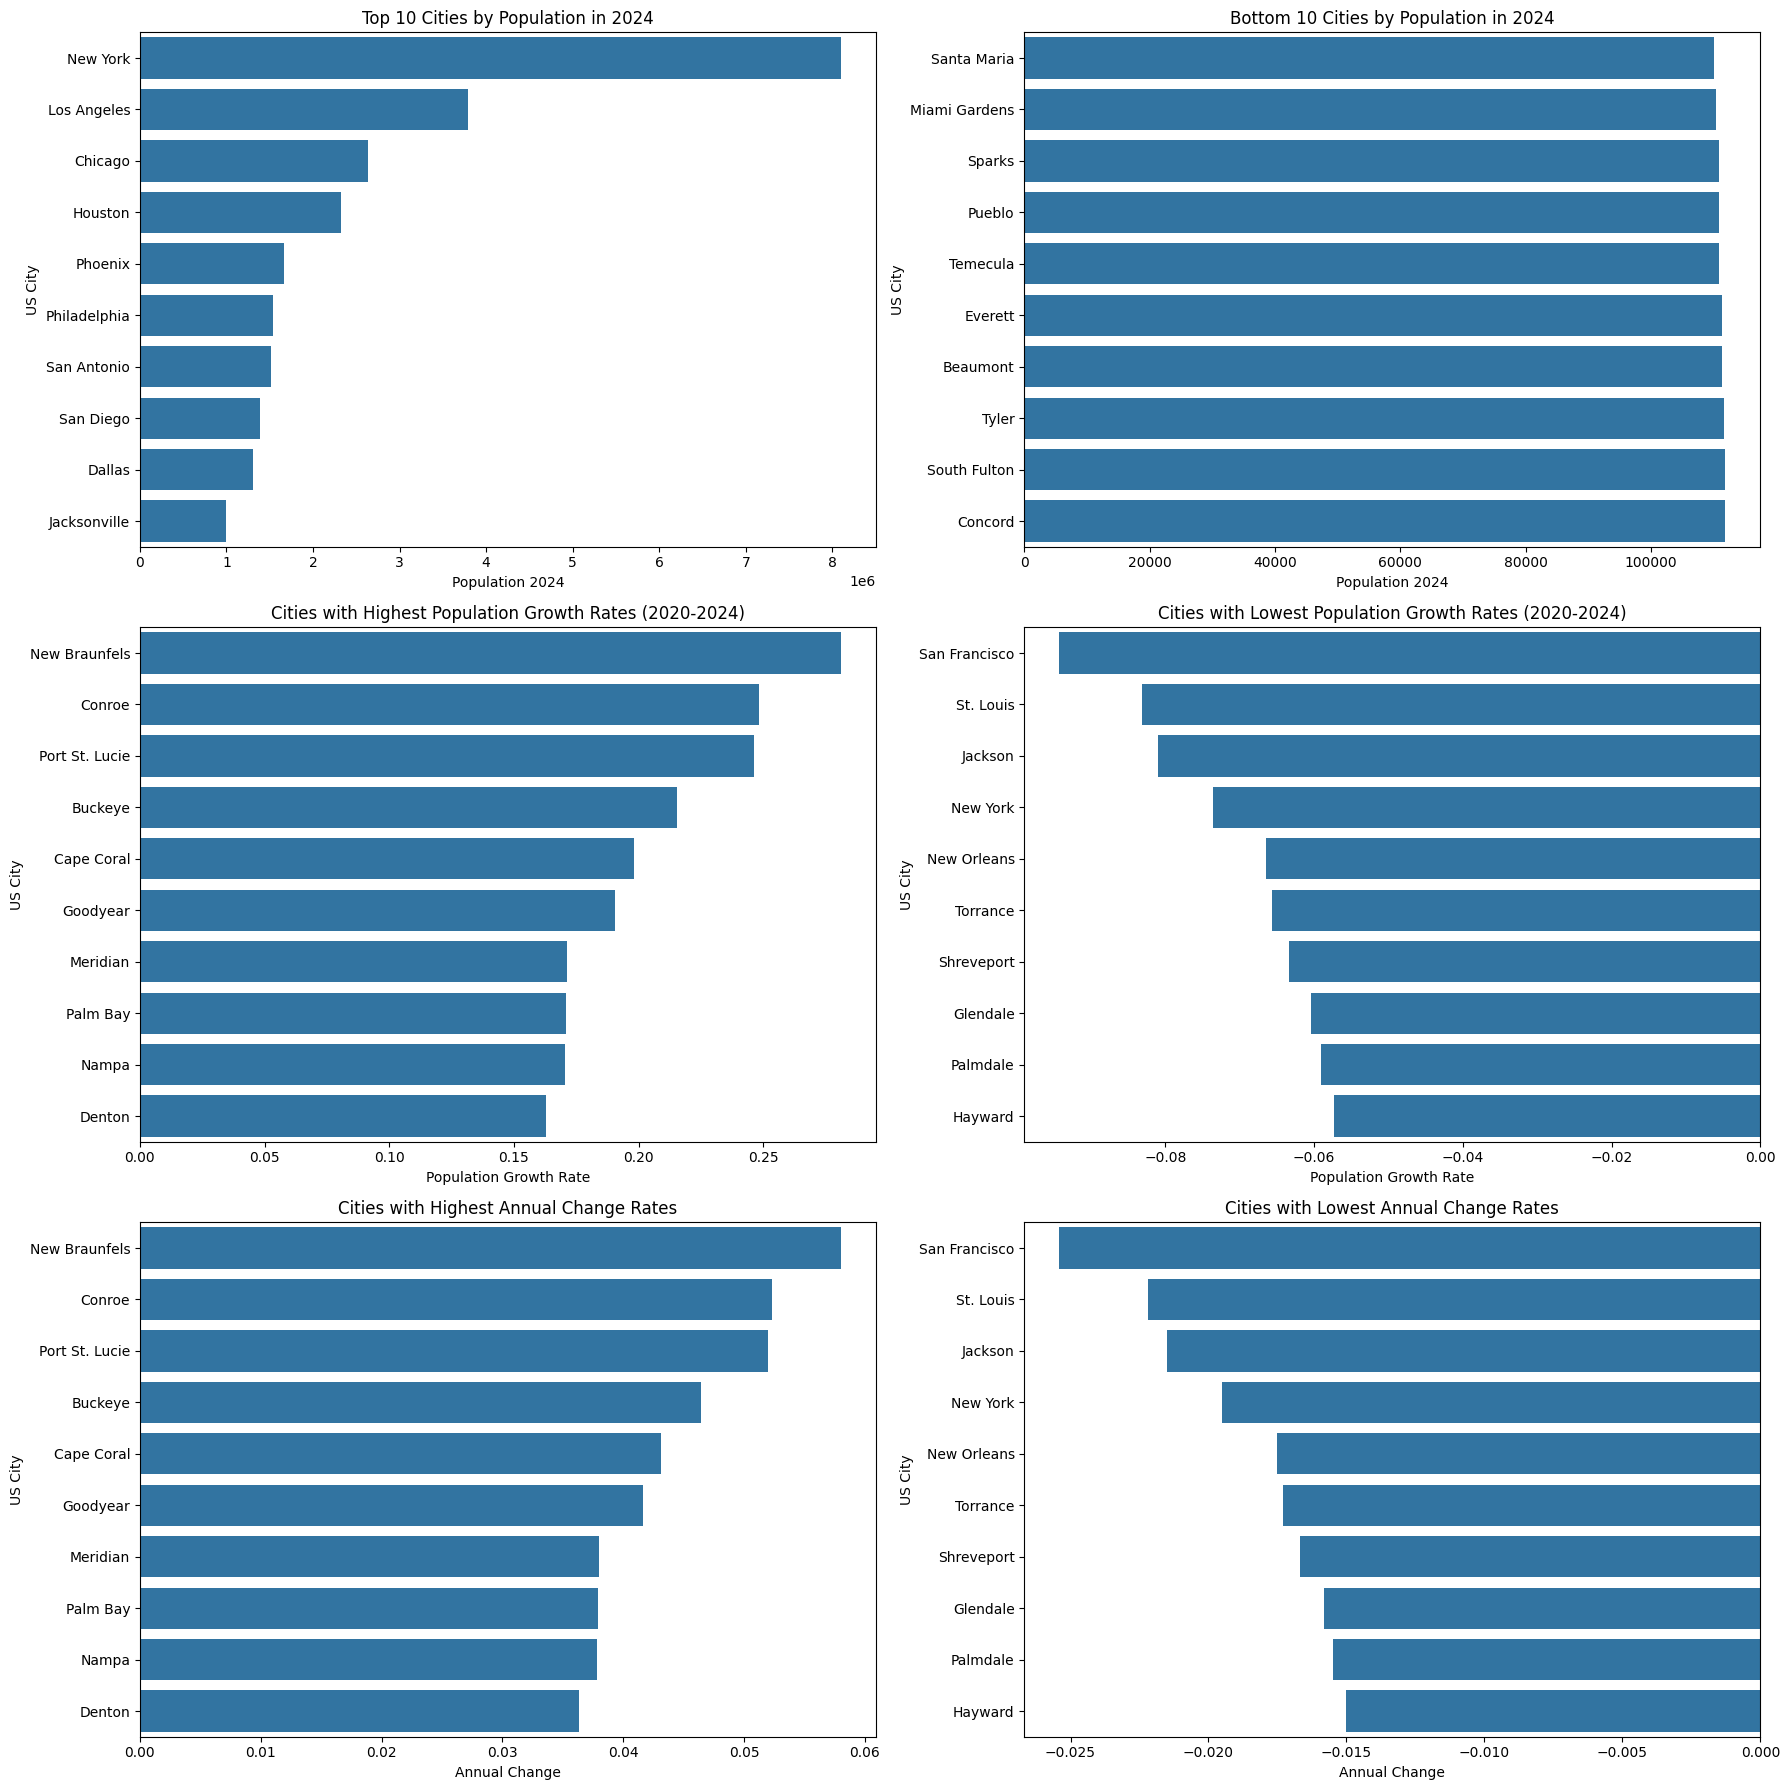

In [15]:
# Plotting population trends
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

sns.barplot(x='Population 2024', y='US City', data=top_10_cities, ax=axs[0, 0])
axs[0, 0].set_title('Top 10 Cities by Population in 2024')
axs[0, 0].set_xlabel('Population 2024')
axs[0, 0].set_ylabel('US City')

sns.barplot(x='Population 2024', y='US City', data=bottom_10_cities, ax=axs[0, 1])
axs[0, 1].set_title('Bottom 10 Cities by Population in 2024')
axs[0, 1].set_xlabel('Population 2024')
axs[0, 1].set_ylabel('US City')

sns.barplot(x='Population Growth Rate', y='US City', data=highest_growth_cities, ax=axs[1, 0])
axs[1, 0].set_title('Cities with Highest Population Growth Rates (2020-2024)')
axs[1, 0].set_xlabel('Population Growth Rate')
axs[1, 0].set_ylabel('US City')

sns.barplot(x='Population Growth Rate', y='US City', data=lowest_growth_cities, ax=axs[1, 1])
axs[1, 1].set_title('Cities with Lowest Population Growth Rates (2020-2024)')
axs[1, 1].set_xlabel('Population Growth Rate')
axs[1, 1].set_ylabel('US City')

sns.barplot(x='Annual Change', y='US City', data=highest_annual_change_cities, ax=axs[2, 0])
axs[2, 0].set_title('Cities with Highest Annual Change Rates')
axs[2, 0].set_xlabel('Annual Change')
axs[2, 0].set_ylabel('US City')

sns.barplot(x='Annual Change', y='US City', data=lowest_annual_change_cities, ax=axs[2, 1])
axs[2, 1].set_title('Cities with Lowest Annual Change Rates')
axs[2, 1].set_xlabel('Annual Change')
axs[2, 1].set_ylabel('US City')

plt.tight_layout()
plt.show()


In [16]:
# Geographical Insights and Density Analysis
# Distribution of Population Across States
population_by_state = data.groupby('US State')['Population 2024'].sum().sort_values(ascending=False)
population_by_state

US State
California              18244451
Texas                   13756588
New York                 8928795
Florida                  5396156
Arizona                  4569930
Illinois                 3486029
North Carolina           3015702
Colorado                 2536955
Nevada                   2536492
Ohio                     2173343
Tennessee                2043949
Pennsylvania             1961838
Virginia                 1874663
Washington               1806659
Georgia                  1460238
Oklahoma                 1372261
Michigan                 1326254
Indiana                  1263181
Massachusetts            1240353
Missouri                 1208163
Kansas                   1018742
Louisiana                1010534
Oregon                    978866
Kentucky                  939333
Alabama                   912682
New Jersey                885665
Minnesota                 847322
Wisconsin                 838116
New Mexico                787427
Nebraska                  775992
D

In [17]:
# Average Population Density by State
average_density_by_state = data.groupby('US State')['Density (/mile2)'].mean().sort_values(ascending=False)
average_density_by_state

US State
New Jersey              15451.750000
New York                11351.200000
District of Columbia    11152.000000
Rhode Island            10367.000000
Massachusetts           10122.000000
Pennsylvania             7996.333333
Maryland                 6909.000000
Connecticut              6222.000000
Hawaii                   5601.000000
California               5274.508197
Minnesota                5269.666667
Washington               4672.142857
Wisconsin                4588.000000
Virginia                 4427.125000
Florida                  4109.041667
Oregon                   4102.666667
Illinois                 4092.285714
Nevada                   4009.333333
Michigan                 3925.000000
Ohio                     3583.833333
New Hampshire            3492.000000
Idaho                    3329.333333
Nebraska                 3158.500000
Colorado                 3108.000000
Utah                     2957.000000
Louisiana                2879.600000
Texas                    2778

In [18]:
# Top 10 cities by density
top_10_density_cities = data.nlargest(10, 'Density (/mile2)')
top_10_density_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,-0.073568
72,73,Jersey City,New Jersey,291559,291949,-0.0003,19769,14.75,-0.001336
174,175,Paterson,New Jersey,155495,159323,-0.0061,18483,8.41,-0.024027
255,256,Cambridge,Massachusetts,118212,118218,0.0000,18479,6.40,-0.000051
16,17,San Francisco,California,788478,870518,-0.0254,16884,46.70,-0.094243
276,277,East Los Angeles,California,113940,120504,-0.0142,15288,7.45,-0.054471
24,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34,-0.042702
41,42,Miami,Florida,460289,442827,0.0096,12787,36.00,0.039433
67,68,Newark,New Jersey,303065,310645,-0.0062,12552,24.14,-0.024401
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75,-0.038337


In [19]:
# Bottom 10 cities by density
bottom_10_density_cities = data.nsmallest(10, 'Density (/mile2)')
bottom_10_density_cities

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate
74,75,Anchorage,Alaska,284469,290893,-0.0056,167,1707.00,-0.022084
275,276,Buckeye,Arizona,113958,93761,0.0464,289,394.83,0.215409
265,266,Goodyear,Arizona,116460,97838,0.0416,609,191.31,0.190335
172,173,Macon-Bibb County,Georgia,156337,157035,-0.0011,627,249.38,-0.004445
126,127,Augusta-Richmond County (balance),Georgia,200512,201999,-0.0018,663,302.28,-0.007361
226,227,Norman,Oklahoma,130674,128161,0.0048,731,178.65,0.019608
89,90,Chesapeake,Virginia,255254,249781,0.0054,754,338.46,0.021911
128,129,Columbus,Georgia,200167,207006,-0.0085,925,216.50,-0.033038
102,103,Huntsville,Alabama,228616,216407,0.0135,1022,223.63,0.056417
197,198,Columbia,South Carolina,144489,136195,0.0146,1045,138.26,0.060898


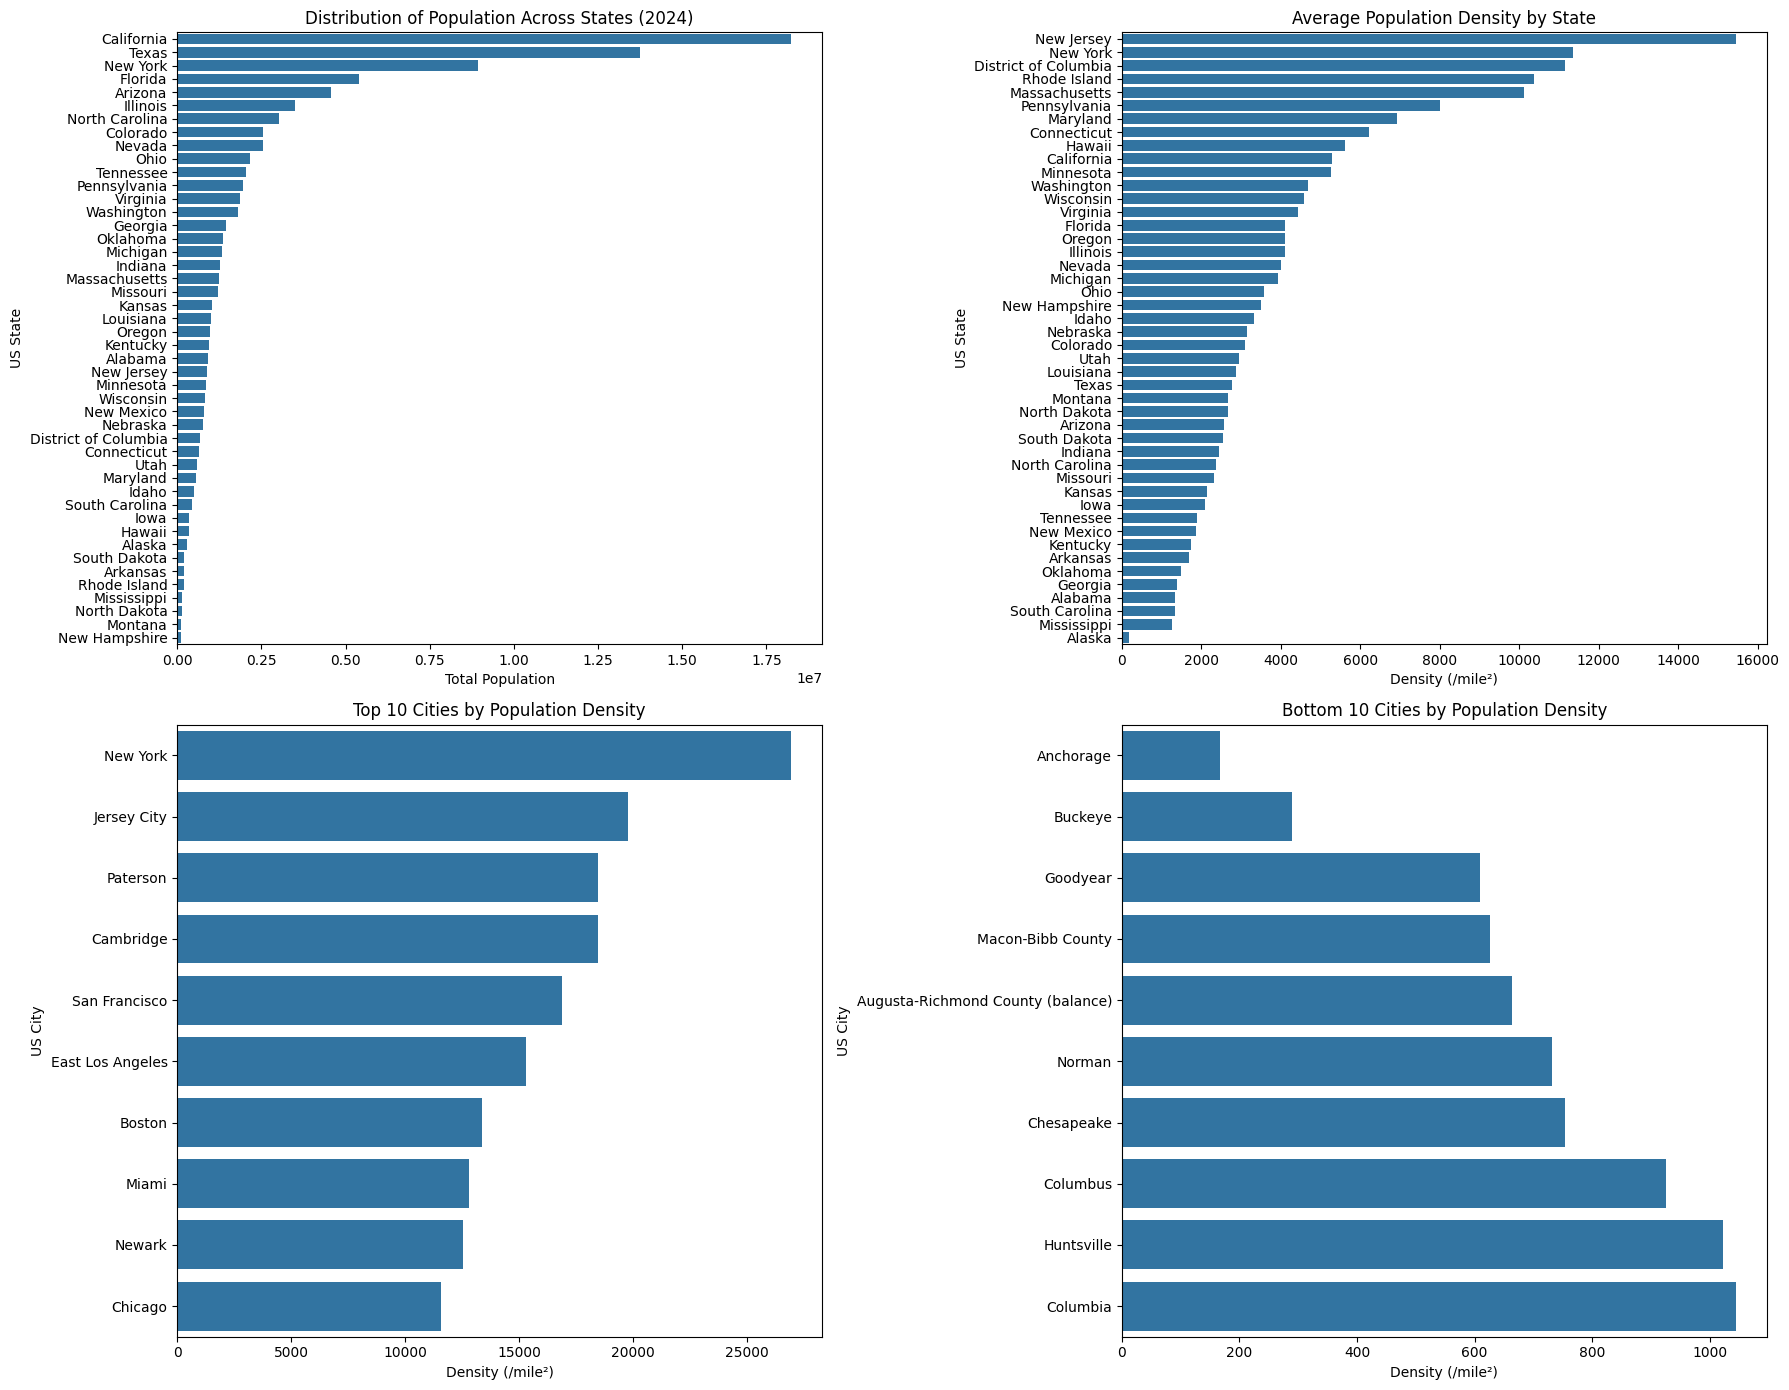

In [20]:
# Plotting geographical insights and density analysis
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

sns.barplot(x=population_by_state.values, y=population_by_state.index, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Population Across States (2024)')
axs[0, 0].set_xlabel('Total Population')
axs[0, 0].set_ylabel('US State')

sns.barplot(x=average_density_by_state.values, y=average_density_by_state.index, ax=axs[0, 1])
axs[0, 1].set_title('Average Population Density by State')
axs[0, 1].set_xlabel('Density (/mile²)')
axs[0, 1].set_ylabel('US State')

sns.barplot(x='Density (/mile2)', y='US City', data=top_10_density_cities, ax=axs[1, 0])
axs[1, 0].set_title('Top 10 Cities by Population Density')
axs[1, 0].set_xlabel('Density (/mile²)')
axs[1, 0].set_ylabel('US City')

sns.barplot(x='Density (/mile2)', y='US City', data=bottom_10_density_cities, ax=axs[1, 1])
axs[1, 1].set_title('Bottom 10 Cities by Population Density')
axs[1, 1].set_xlabel('Density (/mile²)')
axs[1, 1].set_ylabel('US City')

plt.tight_layout()
plt.show()

In [21]:
# Declining cities
data['Difference'] = (data['Population 2024'] - data['Population 2020']) 
Top_positive_difference = data.nlargest(10, 'Difference')
Top_positive_difference

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Population Growth Rate,Difference
6,7,San Antonio,Texas,1513974,1439257,0.0125,3034,498.92,0.051914,74717
10,11,Fort Worth,Texas,996756,923602,0.0187,2846,350.27,0.079205,73154
87,88,Port St. Lucie,Florida,257756,206815,0.0520,2162,119.22,0.246312,50941
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33,0.031100,50148
13,14,Charlotte,North Carolina,923164,875752,0.0130,2971,310.76,0.054139,47412
9,10,Jacksonville,Florida,997164,951880,0.0115,1334,747.26,0.047573,45284
97,98,Cape Coral,Florida,234132,195422,0.0431,2206,106.12,0.198084,38710
71,72,North Las Vegas,Nevada,292623,261214,0.0276,2778,105.32,0.120242,31409
98,99,Frisco,Texas,232424,202754,0.0330,3389,68.59,0.146335,29670
19,20,Oklahoma City,Oklahoma,709330,683078,0.0093,1170,606.48,0.038432,26252
